# Tessellation

A tessellation, or tiling, is a pattern that completely covers a surface using one or more geometric shapes, called tiles, without any overlaps or gaps.

Data retrieved from [Determination of Bee Space and Cell Dimensions for Jimma Zone 
Honeybee Eco-Races (Apis malifera), Southwest Ethiopian ](https://www.researchgate.net/publication/317357440_Determination_of_Bee_Space_and_Cell_Dimensions_for_Jimma_Zone_Honeybee_Eco-Races_Apis_malifera_Southwest_Ethiopian) paper

---

### 1.0) Load and Define Data

In [1]:
# Imports
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Honeybee honeycomb length average (in mm)
side_length = 3.61

# Honeybee honeycomb area calculation (in mm)
area = (3 * math.sqrt(3)) / 2 * math.pow(side_length, 2)

In [3]:
# The maximal diameter of the hexagonal honeycomb (pointy-tip to pointy-tip diameter)
maximal_diameter = side_length * 2  # 7.22

# The minimal diameter of the hexagonal honeycomb (flat side to flat side diameter)
minimal_diameter = math.sqrt(3) / 2 * maximal_diameter  # 6.252703415323646

# The step between rows
vertical_spacing = minimal_diameter

### 2.0) Generate Honeycomb Data

<img src="./assets/hexagon_labelled_vertex.png">

In [ ]:
def get_honeycomb_vertices(x_offset, y_offset):
    """Generates honeycomb (hexagon) vertices given an x and y offset."""
    A = (x_offset, y_offset + (0.5 * minimal_diameter))
    D = (x_offset + maximal_diameter, y_offset + (0.5 * minimal_diameter))

    half_point_btwn_minimal_points = x_offset + 0.5 * maximal_diameter
    B = (half_point_btwn_minimal_points - (0.5 * side_length), y_offset + minimal_diameter)
    C = (half_point_btwn_minimal_points + (0.5 * side_length), y_offset + minimal_diameter)
    F = (half_point_btwn_minimal_points - (0.5 * side_length), y_offset)
    E = (half_point_btwn_minimal_points + (0.5 * side_length), y_offset)

    return [A, B, C, D, E, F]

In [64]:
def generate_honeycomb_tessellation(rows=10, cols=10):
    """Generates a tessellation of honeycombs and outputs vertices to a CSV file."""
    # Honeycomb dimensions
    side_length = 3.61  # mm
    minimal_diameter = 6.252703415323646  # mm
    maximal_diameter = 7.22  # mm
    vertical_spacing = minimal_diameter  # Step between rows

    # Data storage for pandas DataFrame
    data = []

    # Generate the grid
    honeycomb_number = 1
    for row in range(rows):
        for col in range(cols):
            # Calculate x and y offsets for hexagons
            x_offset = col * 1.5 * side_length
            y_offset = row * vertical_spacing
            
            # Stagger every other column (shift by half minimal diameter)
            if col % 2 != 0:
                y_offset += 0.5 * minimal_diameter
            
            # Get vertices
            vertices = get_honeycomb_vertices(x_offset, y_offset)
            
            # Flatten the vertices into a single row for the DataFrame
            row_data = [honeycomb_number]
            for v in vertices:
                row_data.extend([v[0], v[1]])  # Add x and y for each vertex
            
            data.append(row_data)  # Append to the main data list
            honeycomb_number += 1
    
    # Define column headers
    headers = ["honeycomb_number"]
    for i in range(1, 7):  # For 6 vertices
        headers.extend([f"vertex_{i}_x", f"vertex_{i}_y"])
    
    # Create a DataFrame and save to CSV
    df = pd.DataFrame(data, columns=headers)
    df.to_csv('tessellation_honeycomb_data_fcn.csv', index=False)

In [65]:
# Run the function to generate the tessellation dataframe
generate_honeycomb_tessellation()

In [68]:
# Read in the dataframe
df = pd.read_csv('tessellation_honeycomb_data_fcn.csv')
display(df.head())
print(df.shape)

,honeycomb_number,vertex_1_x,vertex_1_y,vertex_2_x,vertex_2_y,vertex_3_x,vertex_3_y,vertex_4_x,vertex_4_y,vertex_5_x,vertex_5_y,vertex_6_x,vertex_6_y
0,1,0.000,3.126352,1.805,6.252703,5.415,6.252703,7.220,3.126352,5.415,0.000000,1.805,0.000000
1,2,5.415,6.252703,7.220,9.379055,10.830,9.379055,12.635,6.252703,10.830,3.126352,7.220,3.126352
2,3,10.830,3.126352,12.635,6.252703,16.245,6.252703,18.050,3.126352,16.245,0.000000,12.635,0.000000
3,4,16.245,6.252703,18.050,9.379055,21.660,9.379055,23.465,6.252703,21.660,3.126352,18.050,3.126352
4,5,21.660,3.126352,23.465,6.252703,27.075,6.252703,28.880,3.126352,27.075,0.000000,23.465,0.000000


(100, 13)


### 3.0) Plot the Honeycomb Data

In [91]:
def plot_honeycomb_tessellation(df):
    """Plots honeycomb vertices as connected hexagons."""

    # Initialize the plot
    plt.figure(figsize=(10, 10))
    
    # Loop through each honeycomb
    for _, row in df.iterrows():
        # Extract the x and y coordinates for the vertices
        x_coords = [row[f"vertex_{i}_x"] for i in range(1, 7)] + [row["vertex_1_x"]]  # Close the hexagon
        y_coords = [row[f"vertex_{i}_y"] for i in range(1, 7)] + [row["vertex_1_y"]]
        
        # Plot the honeycomb
        # Fill the hexagon with a honeycomb color
        plt.fill(x_coords, y_coords, color='#FFD700', alpha=0.5, edgecolor='black', linewidth=1.5)
        # Connect vertices with lines
        plt.plot(x_coords, y_coords, c='darkgoldenrod')
        # Mark the vertices with dots
        plt.scatter(x_coords[:-1], y_coords[:-1], c='darkgoldenrod', s=30, marker='h')
    
    # Configure plot appearance
    plt.title("Tessellation of Honeycombs")
    plt.xlabel("X Coordinate (mm)")
    plt.ylabel("Y Coordinate (mm)")
    # Ensure equal scaling for x and y axes
    plt.axis('equal')
    plt.grid(True)
    plt.savefig('./assets/tessellation_output.pdf')
    plt.show()

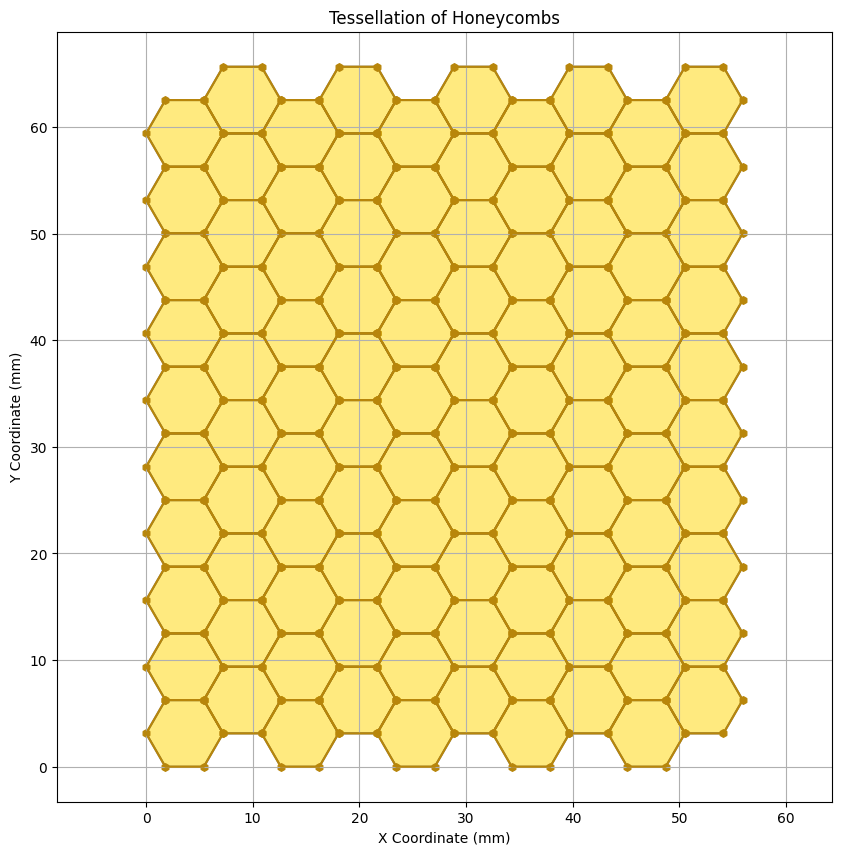

In [92]:
# Call the function to plot the honeycombs
plot_honeycomb_tessellation(df)